### Importing libraries and cleaned data from previous notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype,is_numeric_dtype
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('..\data\cleaned data.csv')

In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


As a reminder, out target variable is 'income'.
<br>Income __above__ 50k is denominated with __value=1__
<br>Income __below__ 50k is denominated with __value=0__

### EDA Visualizations

In [4]:
# Separating columns in numerical and categorical
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)   
        
print(num_list)
print(cat_list)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


Let's look at the distribution of our target variable (income)

In [5]:
# Setting seaborn plotting aesthetics as default
sns.set()

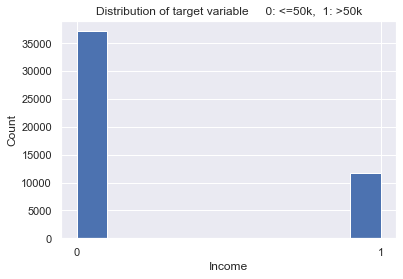

In [6]:
plt.figure(figsize=(6,4))
plt.title('Distribution of target variable     0: <=50k,  1: >50k')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(ticks=[0,1])
df.income.hist();

Let's explore the relation between our features and target variable income

### Numerical

In [7]:
print(num_list)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


<AxesSubplot:xlabel='income', ylabel='capital-loss'>

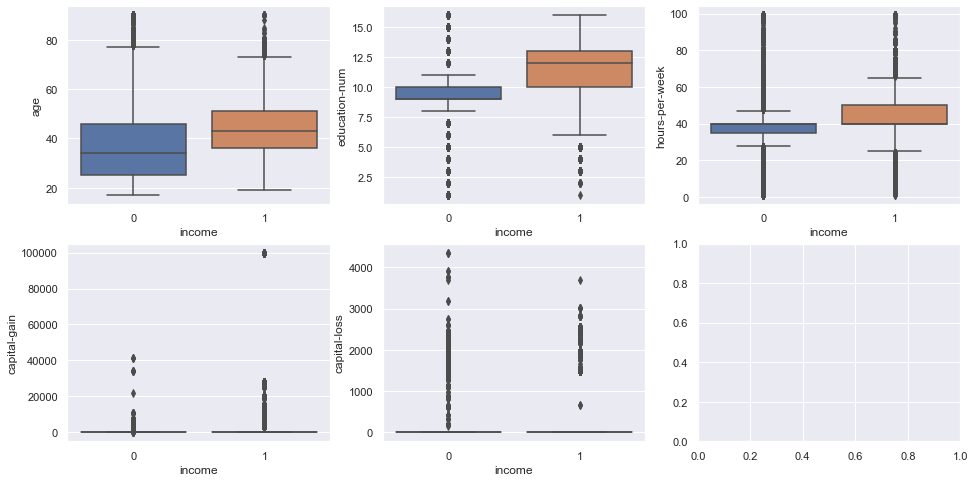

In [8]:
sns.set(rc = {'figure.figsize':(16,8)})

# defining subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

# create boxplot in each subplot
sns.boxplot(data=df, x='income', y='age', ax=axes[0,0])
sns.boxplot(data=df, x='income', y='education-num', ax=axes[0,1])
sns.boxplot(data=df, x='income', y='hours-per-week', ax=axes[0,2])
sns.boxplot(data=df, x='income', y='capital-gain', ax=axes[1,0])
sns.boxplot(data=df, x='income', y='capital-loss', ax=axes[1,1])

Since we can't really appreciated the difference in capital gain and loss, we'll plot a subset of them.

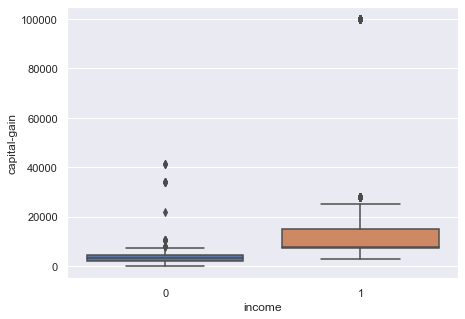

In [9]:
cap_gain_df = df[df['capital-gain'] > 0][['capital-gain','income']]
plt.figure(figsize=(7,5))
sns.boxplot(data=cap_gain_df, x='income', y='capital-gain');

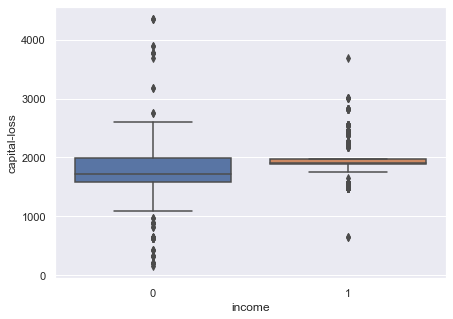

In [10]:
cap_loss_df = df[df['capital-loss'] > 0][['capital-loss','income']]
plt.figure(figsize=(7,5))
sns.boxplot(data=cap_loss_df, x='income', y='capital-loss');

__Findings:__
<br>'education-num', 'hours-per-week' and 'capital_gain' seem to have a more defined difference between income >50k (value=1) or lower(value=0). 
<br>There is also some difference in 'age'.
<br>'capital loss' don't seem to influence that much at first glance.

### Categorical
<br>For better visibility and customization, we'll plot them individually

In [11]:
print(cat_list)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


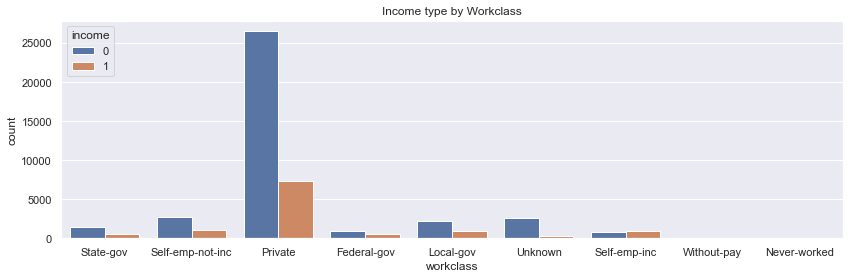

In [12]:
plt.figure(figsize=(14,4))
plt.title('Income type by Workclass')
sns.countplot(data=df, x='workclass', hue='income');

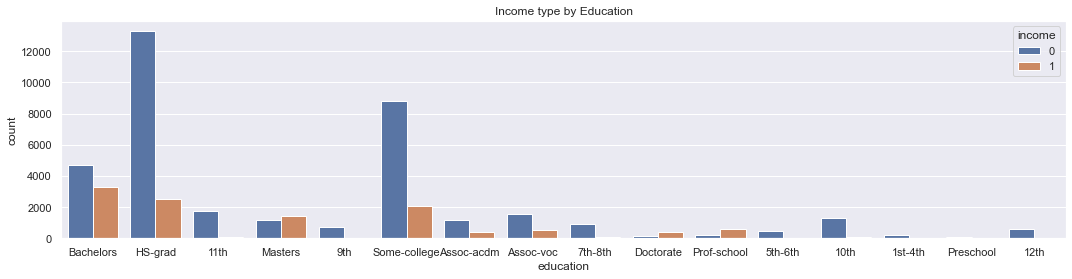

In [13]:
plt.figure(figsize=(18,4))
plt.title('Income type by Education')
sns.countplot(data=df, x='education', hue='income');

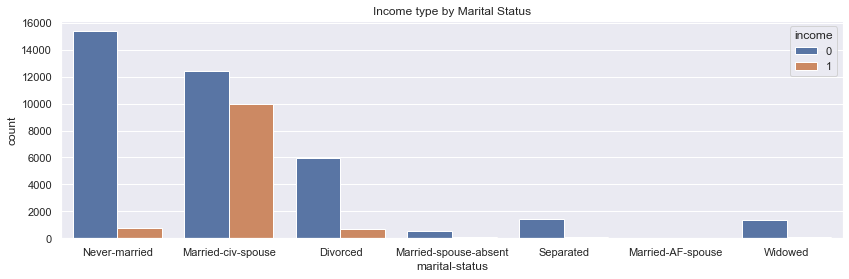

In [14]:
plt.figure(figsize=(14,4))
plt.title('Income type by Marital Status')
sns.countplot(data=df, x='marital-status', hue='income');

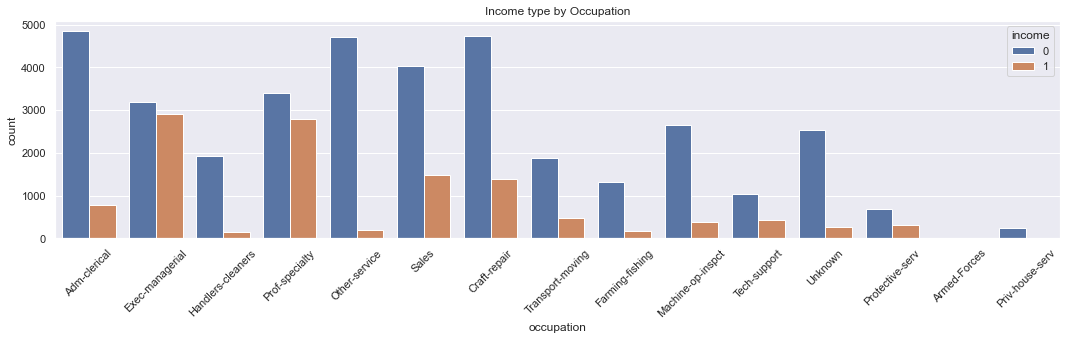

In [15]:
plt.figure(figsize=(18,4))
plt.title('Income type by Occupation')
sns.countplot(data=df, x='occupation', hue='income')
plt.xticks(rotation=45);

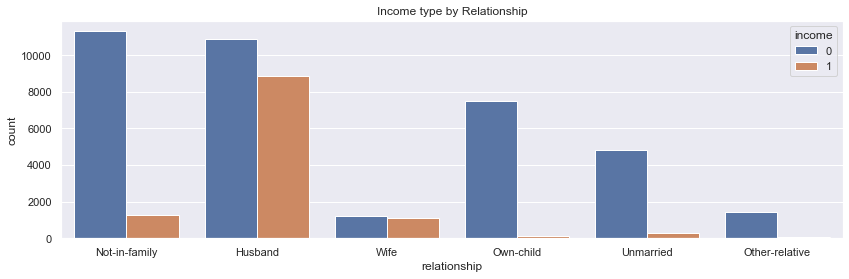

In [16]:
plt.figure(figsize=(14,4))
plt.title('Income type by Relationship')
sns.countplot(data=df, x='relationship', hue='income');

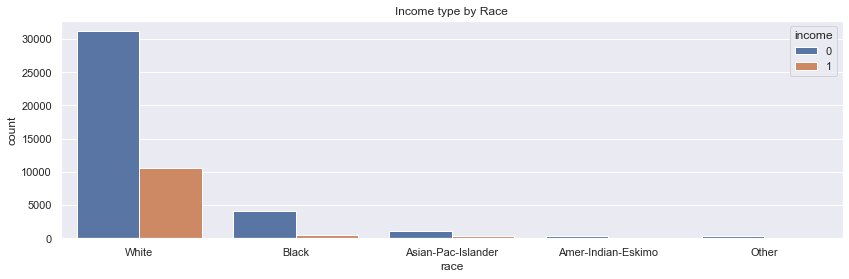

In [17]:
plt.figure(figsize=(14,4))
plt.title('Income type by Race')
sns.countplot(data=df, x='race', hue='income');

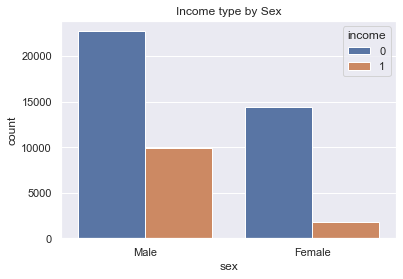

In [18]:
plt.figure(figsize=(6,4))
plt.title('Income type by Sex')
sns.countplot(data=df, x='sex', hue='income');

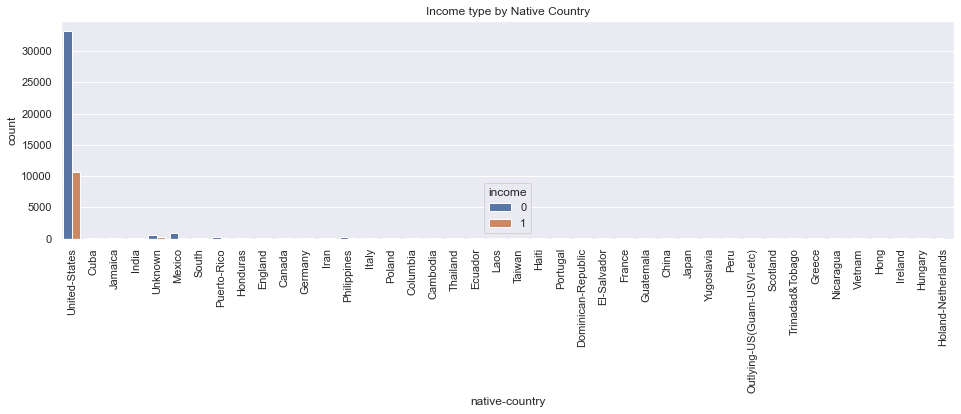

In [19]:
plt.figure(figsize=(16,4))
plt.title('Income type by Native Country')
sns.countplot(data=df, x='native-country', hue='income')
plt.xticks(rotation=90);

__Findings:__
<br>Workclass - Seems to diferentiate in most categories, specially in Private
<br>Education - HS-grad and some-college lean towards <50k as expected, Bachelors more balanced with majority <50k, Masters more balanced with slight majority >50k, Doctorate slight majority >50k
<br>Marital Status - Married with civ spouse more balanced with majority <50k, most of never married and divorced <50k
<br>Occupation - Most of the occupations leaning more towards <50k, except for Exec-managerial and Prof-speciality which are more balanced
<br>Relationship - Wife almost equally balanced, Husband also balanced with majority <50k, other categories lean towards <50k
<br>Race - Vast number of our records have white as Race and lean towards <50k
<br>Sex - Higher chance of >50k for males, still less than 50%
<br>Native Country - Most of the records are from US, with about 25% chance of >50k

### Adding 2 additional features (bucketing for age and hours-per-week)

In [20]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [21]:
hours_bins = [0, 15, 25, 46, 100]
hours_labels = ['flexible', 'part-time', 'full-time', 'overtime']
df['work_schedule'] = pd.cut(df['hours-per-week'], bins=hours_bins, labels=hours_labels)

In [22]:
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_range,work_schedule
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,30-40,full-time
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,40-50,flexible
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,30-40,full-time


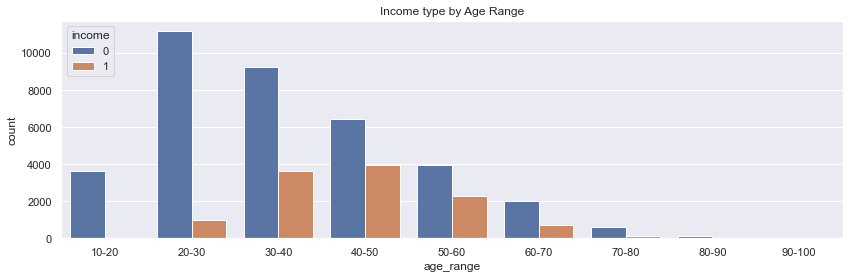

In [23]:
plt.figure(figsize=(14,4))
plt.title('Income type by Age Range')
sns.countplot(data=df, x='age_range', hue='income');

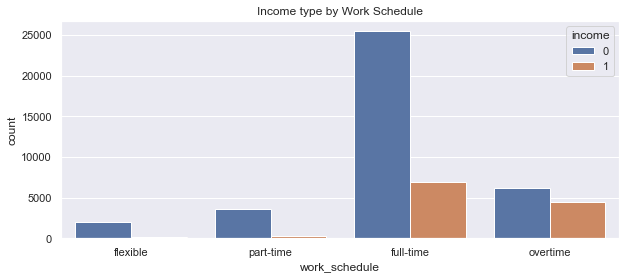

In [24]:
plt.figure(figsize=(10,4))
plt.title('Income type by Work Schedule')
sns.countplot(data=df, x='work_schedule', hue='income');

### Correlation heatmap for numerical vs target

<AxesSubplot:>

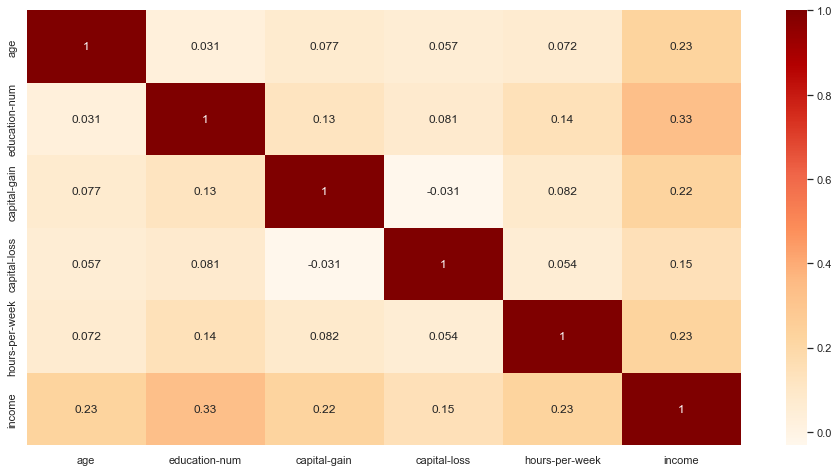

In [25]:
# plotting correlation heatmap for numerical variables
sns.heatmap(df[num_list].corr(), cmap='OrRd', annot=True)

Education-num has the highest correlation with 0.33.
<br> Age, capital-gain and hours-per-week follow with 0.22 - 0.23

### Correlation for categorical vs target

Since we can't get correlation between categorical variables, we'll use this formula for Cramers V

In [26]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [27]:
# Adding 2 new columns to cat_list
cat_list.extend(('age_range','work_schedule'))

In [28]:
# Saving values for each category in a dictionary

corr_cat_dict = {}

for cat in cat_list:
    corr_cat_dict[cat] = cramers_v(df[cat], df['income'])

corr_cat_dict

{'workclass': 0.18115107631207908,
 'education': 0.3654521366236938,
 'marital-status': 0.4481697711621431,
 'occupation': 0.34959439912635987,
 'relationship': 0.45437891144289516,
 'race': 0.09944731744509899,
 'sex': 0.21453154666546925,
 'native-country': 0.09175910125047917,
 'age_range': 0.3080983838642458,
 'work_schedule': 0.24460695588806117}

In [29]:
# Converting to a dataframe to sort the values
df_corr_cat = pd.DataFrame.from_dict(corr_cat_dict, orient='index')
df_corr_cat.columns=['income']
df_corr_cat.sort_values('income', ascending=False)

,income
relationship,0.454379
marital-status,0.448170
education,0.365452
occupation,0.349594
age_range,0.308098
work_schedule,0.244607
sex,0.214532
workclass,0.181151
race,0.099447
native-country,0.091759


<AxesSubplot:>

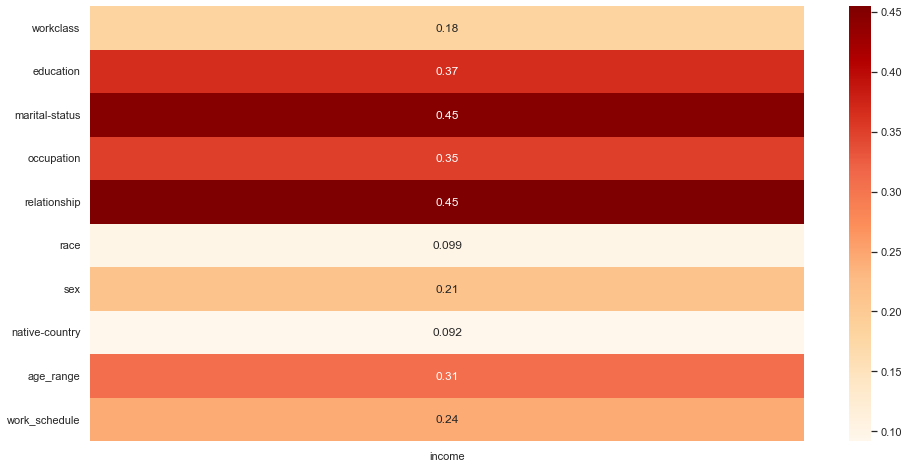

In [30]:
sns.heatmap(df_corr_cat, cmap='OrRd', annot=True)

Based on this, we can say that relationship, marital status, education, occupation and age_range might have some influence on the target. We'll determine later if work_schedule, sex and workclass should be included as well.

In [31]:
cramers_v (df['relationship'], df['marital-status'])

0.4880589431633566

In [32]:
cramers_v (df['occupation'], df['workclass'])

0.3997244048209072

In [33]:
cramers_v (df['occupation'], df['education'])

0.18594093741475548

### Encoding categorical columns

We'll encode the categorical columns in preparation for a Random Forest basic model we'll do to get feature importances. I tried using pandas get_dummies, but ended up with more than 100 columns which will not be easy for getting feature importance.

In [34]:
# Making a copy of our dataframe
df_encoded = df.copy()

In [35]:
# Creating an Ordinal Encoder instance
enc = OrdinalEncoder()

In [36]:
df_encoded[cat_list] = enc.fit_transform(df_encoded[cat_list])

In [37]:
df_encoded.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_range,work_schedule
0,39,6.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,0,2.0,1.0
1,50,5.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0,3.0,0.0
2,38,3.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0,2.0,1.0
3,53,3.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0,4.0,1.0
4,28,3.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0,1.0,1.0


We can see now that our categorical features have been encoded

### Train/Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns='income'),  
                                                    df_encoded.income, test_size=0.3, 
                                                    random_state=42)

In [39]:
X_train.shape, X_test.shape

((34189, 15), (14653, 15))

In [40]:
y_train.shape, y_test.shape

((34189,), (14653,))

### Random Forest model

We're creating a basic Random Forest model to get the feature importances of the model. Then we can compare with our findings from the visualizations.

In [41]:
rf_clf = RandomForestClassifier(random_state=42)

In [42]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
rf_clf.feature_importances_

array([0.17201936, 0.0517963 , 0.03839791, 0.09546929, 0.07683132,
       0.08992875, 0.10418564, 0.01781021, 0.01410491, 0.12645578,
       0.04066485, 0.09105064, 0.02366458, 0.04345221, 0.01416825])

Text(0.5, 0, 'Random Forest feature importance')

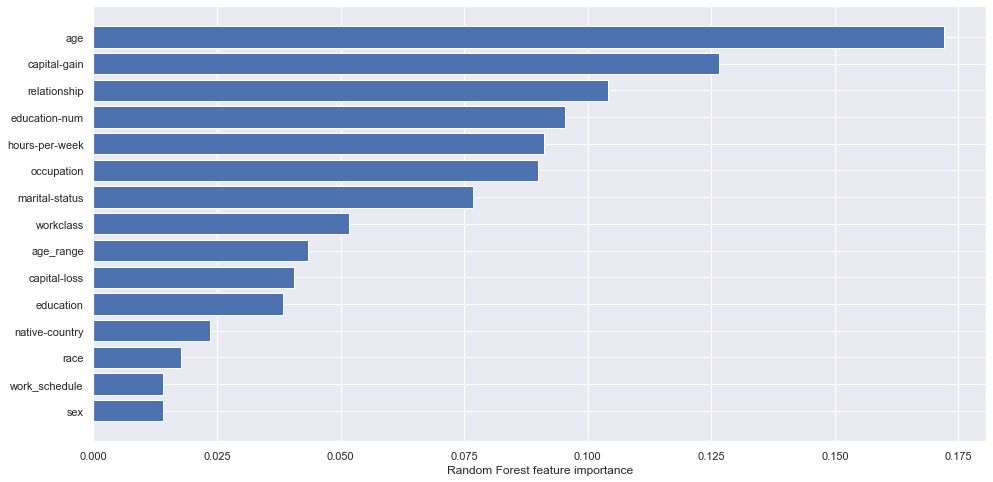

In [44]:
sorted_idx = rf_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_clf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest feature importance')

In [45]:
# Cross validating to know the accuracy of the basic model
cv_results = cross_validate(rf_clf, X_train, y_train, cv=5)

In [46]:
np.mean(cv_results['test_score'])

0.8494253370690071